In [2]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.io import fits
import photutils

plt.rcParams["font.family"] = "Times New Roman"
plt.rc('font', size=15)

In [3]:
bias = np.arange(1028,1039,1)
dark5 = np.arange(1039, 1044,1)
dark10 = np.arange(1044,1049,1)
dark20 = np.arange(1049, 1054,1)

dflat = np.arange(1054, 1070,1)

skyflat = np.arange(1134,1139,1)

In [4]:
bias_median = np.zeros(shape=(1024, 1056))

bias_master = np.zeros(shape = (11, 1024, 1056))
i=0
for bi in bias:
    loop_hdul = fits.open('C:\\Users\\dougl\\Desktop\\Githubwork\\Callibration Pluto\d'+str(bi)+'.fits')
    loop_img = np.asarray(loop_hdul[0].data)
    
    bias_master[i,:] = loop_img
    
    i+=1

In [5]:
from tqdm import tqdm
#taking median of all bias measurements. Inefficient nested loop but should be fine.
for i in tqdm(range(0, 1024)):
    for j in range(0, 1056):
        bias_median[i,j] = np.median(bias_master[:,i,j])
        

100%|██████████████████████████████████████████████████████████████████████████████| 1024/1024 [00:53<00:00, 19.25it/s]


In [ ]:
np.save("C:\\Users\\dougl\\Desktop\\Githubwork\\Callibration Pluto\Bias_Median.npy", bias_median)

Text(0.5, 1.0, 'Bias Median')

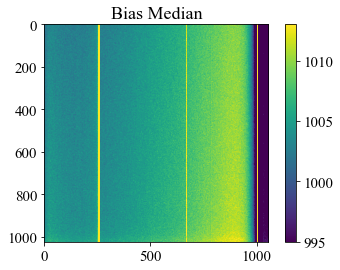

In [6]:
#plotting to check
Z = plt.imshow(bias_median, vmin=995, vmax=1013)
plt.colorbar(Z)

plt.title("Bias Median")

In [6]:
# appending all darks into one 3d array
dark_master = np.zeros(shape=(15, 1024, 1056))

i =0
for d5 in dark5:
    loop_hdul = fits.open('C:\\Users\\dougl\\Desktop\\Githubwork\\Callibration Pluto\d'+str(d5)+'.fits')
    loop_img = np.asarray(loop_hdul[0].data)
    
    dark_master[i, :] = (loop_img-bias_median)/5 #subtracting bias from dark and dividing by exposure time.
    i+=1
    
for d10 in dark10:
    loop_hdul = fits.open('C:\\Users\\dougl\\Desktop\\Githubwork\\Callibration Pluto\d'+str(d10)+'.fits')
    loop_img = np.asarray(loop_hdul[0].data)
    
    dark_master[i, :] = (loop_img-bias_median)/10
    i+=1
    
for d20 in dark20:
    loop_hdul = fits.open('C:\\Users\\dougl\\Desktop\\Githubwork\\Callibration Pluto\d'+str(d20)+'.fits')
    loop_img = np.asarray(loop_hdul[0].data)
    
    dark_master[i, :] = (loop_img-bias_median)/20
    i+=1
    

In [7]:
#taking the median of all darks, same as before
dark_median = np.zeros(shape=(1024,1056))
for i in tqdm(range(0, 1024)):
    for j in range(0, 1056):
        dark_median[i,j] = np.median(dark_master[:,i,j])

100%|██████████████████████████████████████████████████████████████████████████████| 1024/1024 [01:02<00:00, 16.39it/s]


In [27]:
np.save("C:\\Users\\dougl\\Desktop\\Githubwork\\Callibration Pluto\Dark_Median.npy", dark_median)

Text(0.5, 1.0, 'Dark Image Median')

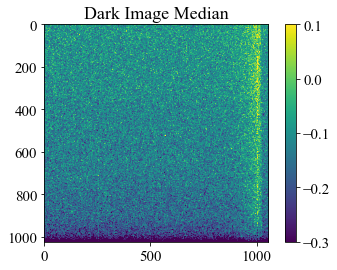

In [8]:
#plotting to check
Z = plt.imshow(dark_median, vmin=-0.3, vmax=0.1)
plt.colorbar(Z)

plt.title("Dark Image Median")

In [9]:
#Appending all sky flats into one 3d array. No loop here because we only had 5 skyflats.
flat_field_master = np.zeros(shape=(5, 1024, 1056))

loop_hdul = fits.open('C:\\Users\\dougl\\Desktop\\Githubwork\\Callibration Pluto\d1134.fits')
loop_img = np.asarray(loop_hdul[0].data)

#subtracting the bias, then dividing by exposure time, and then subtracting the dark obtained in previous cell    
numerator = ((loop_img-bias_median)/5) - dark_median
flat_field_master[0, :] = numerator/np.mean(numerator) #normalizing it

loop_hdul = fits.open('C:\\Users\\dougl\\Desktop\\Githubwork\\Callibration Pluto\d1135.fits')
loop_img = np.asarray(loop_hdul[0].data)

numerator = ((loop_img-bias_median)/6) - dark_median
flat_field_master[1, :] = numerator/np.mean(numerator)

loop_hdul = fits.open('C:\\Users\\dougl\\Desktop\\Githubwork\\Callibration Pluto\d1136.fits')
loop_img = np.asarray(loop_hdul[0].data)

numerator = ((loop_img-bias_median)/10) - dark_median
flat_field_master[2, :] = numerator/np.mean(numerator)

loop_hdul = fits.open('C:\\Users\\dougl\\Desktop\\Githubwork\\Callibration Pluto\d1137.fits')
loop_img = np.asarray(loop_hdul[0].data)
    
numerator = ((loop_img-bias_median)/10) - dark_median
flat_field_master[3, :] = numerator/np.mean(numerator)

loop_hdul = fits.open('C:\\Users\\dougl\\Desktop\\Githubwork\\Callibration Pluto\d1138.fits')
loop_img = np.asarray(loop_hdul[0].data)
    
numerator = ((loop_img-bias_median)/10) - dark_median
flat_field_master[4, :] = numerator/np.mean(numerator)

In [10]:
#taking the median of all the sky_flats like before
flat_median = np.zeros(shape=(1024,1056))
for i in tqdm(range(0, 1024)):
    for j in range(0, 1056):
        flat_median[i,j] = np.median(flat_field_master[:,i,j])

100%|██████████████████████████████████████████████████████████████████████████████| 1024/1024 [00:50<00:00, 20.43it/s]


Text(0.5, 1.0, 'Flat Field Image Normalized Median')

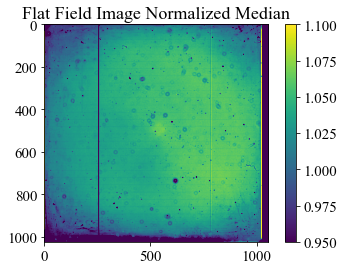

In [12]:
#normalizing the flat by the mean value
flat_median_norm = flat_median/np.mean(flat_median)

#plotting to check.
Z = plt.imshow(flat_median, vmin=0.95, vmax=1.1)
plt.colorbar(Z)

plt.title("Flat Field Image Normalized Median")

In [19]:
np.save("C:\\Users\\dougl\\Desktop\\Githubwork\\Callibration Pluto\Flat_Median.npy", flat_median_norm)

In [13]:
#index of science observations
science = np.arange(1178, 1190, 1)

#Appending all science observations into one 3d array
science_master = np.zeros(shape=(12, 1024, 1056))

i=0
for pluto in science:
    loop_hdul = fits.open('C:\\Users\\dougl\\Desktop\\Githubwork\\Callibration Pluto\d'+str(pluto)+'.fits')
    loop_img = np.asarray(loop_hdul[0].data)
    
    #Subtract bias, divide by exposure time, then subtract dark. Divide all that by the normalized flat
    science_master[i, :] = (((loop_img-bias_median)/15) - dark_median)/flat_median_norm
    i+=1

<ipython-input-13-ac125f8d74cd>:13: RuntimeWarning: divide by zero encountered in true_divide
  science_master[i, :] = (((loop_img-bias_median)/15) - dark_median)/flat_median_norm
<ipython-input-13-ac125f8d74cd>:13: RuntimeWarning: invalid value encountered in true_divide
  science_master[i, :] = (((loop_img-bias_median)/15) - dark_median)/flat_median_norm


In [14]:
#taking the median of all science data.
science_median = np.zeros(shape=(1024,1056))
for i in tqdm(range(0, 1024)):
    for j in range(0, 1056):
        science_median[i,j] = np.median(science_master[:,i,j])

100%|██████████████████████████████████████████████████████████████████████████████| 1024/1024 [00:51<00:00, 19.96it/s]


(0.0, 1014.0)

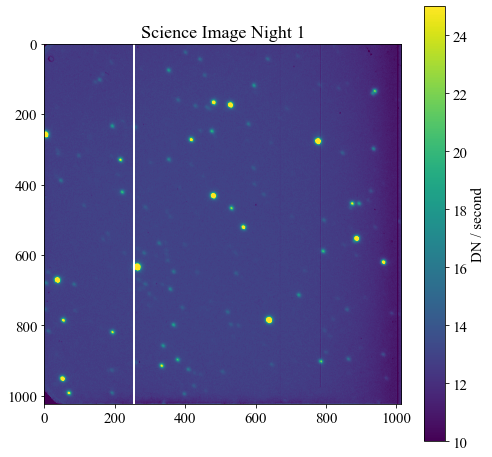

In [15]:
#plotting to check. 
plt.figure(figsize=(8,8))
Z = plt.imshow(science_median, vmin=10, vmax=25)
cbar=plt.colorbar(Z)
cbar.set_label("DN / second")
plt.title("Science Image Night 1")
plt.xlim(0,1014)

In [23]:
np.save("C:\\Users\\dougl\\Desktop\\Githubwork\\Callibration Pluto\Science_Median1.npy", science_median)

In [22]:
#Doing the same thing for pluto night 2
science_master2 = np.zeros(shape=(2, 1024, 1056))

i=0
for pluto in [2104, 2105]:
    loop_hdul = fits.open('C:\\Users\\dougl\\Desktop\\Githubwork\\Callibration Pluto\d'+str(pluto)+'.fits')
    loop_img = np.asarray(loop_hdul[0].data)
    
    #Subtract bias, divide by exposure time, then subtract dark. Divide all that by the normalized flat
    science_master2[i, :] = (((loop_img-bias_median)/15) - dark_median)/flat_median_norm
    i+=1
    
science_median2 = np.zeros(shape=(1024,1056))
for i in tqdm(range(0,1024)):
    for j in range(0,1056):
        science_median2[i,j] = np.median(science_master2[:,i,j])

<ipython-input-22-4341e7cff716>:9: RuntimeWarning: divide by zero encountered in true_divide
  science_master2[i, :] = (((loop_img-bias_median)/15) - dark_median)/flat_median_norm
<ipython-input-22-4341e7cff716>:9: RuntimeWarning: invalid value encountered in true_divide
  science_master2[i, :] = (((loop_img-bias_median)/15) - dark_median)/flat_median_norm
100%|██████████████████████████████████████████████████████████████████████████████| 1024/1024 [00:56<00:00, 18.28it/s]


(0.0, 1014.0)

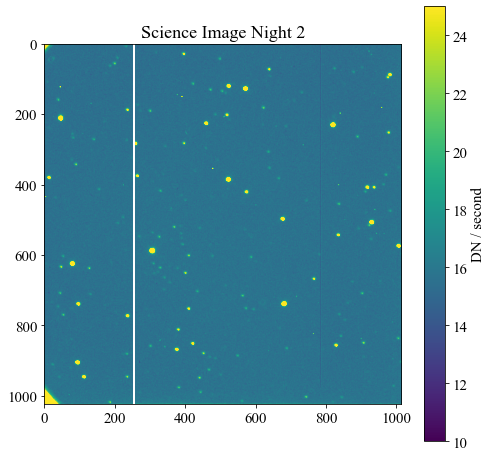

In [23]:
#plotting to check

plt.figure(figsize=(8,8))
Z = plt.imshow(science_median2, vmin=10, vmax=25)
cbar=plt.colorbar(Z)
cbar.set_label("DN / second")
plt.title("Science Image Night 2")
plt.xlim(0,1014)

In [25]:
np.save("C:\\Users\\dougl\\Desktop\\Githubwork\\Callibration Pluto\Science_Median2.npy", science_median2)

Trying to center both frames on the same star to measure the distance pluto moved. Starting by measuring the centroid of the star on both frames. Initial guesses based on DS9

In [30]:

x2 = 574
y2 = 422

print(photutils.centroids.centroid_sources(science_median2, x2, y2))


cutout2 = science_median2[422-250:422+250, 574-250:574+250]

x1 = 532
y1 = 469

print(photutils.centroids.centroid_sources(science_median, x1, y1))
cutout1 = science_median[469-250:469+250, 532-250:532+250]



(array([573.99531462]), array([421.94055623]))
(array([531.89115368]), array([468.82982332]))


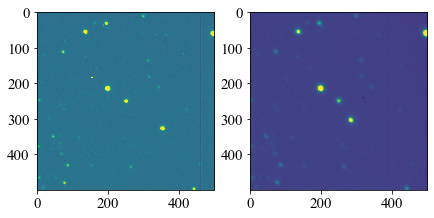

In [34]:
#plotting both cutouts to see if they are centered on the same star

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(7,5))
axs[0].imshow(cutout2, vmin=10, vmax=25.)
axs[1].imshow(cutout1, vmin=10, vmax=25)

In [35]:
#Saving them as fits files to blink in DS9
hdu = fits.PrimaryHDU(cutout2)
hdu.writeto('Pluto2.fits', overwrite=True)

hdu = fits.PrimaryHDU(cutout1)
hdu.writeto('Pluto1.fits', overwrite=True)

In [37]:
#Measuring the center of pluto in both frames and calculating the distance in pixels. Initial guesses based on DS9

plutox1 = 288
plutoy1 = 305

px1, py1 = photutils.centroids.centroid_sources(cutout1, plutox1, plutoy1)

plutox2 = 354
plutoy2 = 328

px2, py2 = photutils.centroids.centroid_sources(cutout2, plutox2, plutoy2)

dx = (px1 - px2)**2
dy = (py1 - py2)**2

distance = np.sqrt(dx + dy)
print("Pluto moved "+str(distance[0])+" pixels in ~24 hours")

Pluto moved 69.95849085632518 pixels in ~24 hours


In [38]:
#Nickel has a  0.184 arcsec/pixel plate scale, so then to convert we just multiply

distance_arcs = distance*0.184

print("Pluto moved "+str(distance_arcs[0])+" arcseconds in ~24 hours")

Pluto moved 12.872362317563834 arcseconds in ~24 hours
